In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chennai_reservoir_levels.csv')
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [4]:
df.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5642,13-06-2019,30.0,0.0,0.0,1.0
5643,14-06-2019,28.0,0.0,0.0,1.0
5644,15-06-2019,27.0,0.0,0.0,1.0
5645,16-06-2019,26.0,0.0,0.0,1.0
5646,17-06-2019,25.0,0.0,0.0,1.0


In [6]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [8]:
df['Year']= df['Date'].apply(lambda x:x.year)
df['Month']= df['Date'].apply(lambda x:x.month)

In [9]:
df.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1


In [10]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Year',
       'Month'],
      dtype='object')

In [14]:
df['Total'] = df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']].sum(axis=1)
df.head(2)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9


In [20]:
#Yearwise trend

Yearwise = df.groupby('Year',as_index=False)
Yearwise.mean().head(3)

,Year,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month,Total
0,2004,2004-07-01 12:00:00,77.766967,19.060109,220.899180,68.683060,6.513661,386.409317
1,2005,2005-07-02 00:00:00,722.680603,147.771781,1468.480712,581.345205,6.526027,2920.278301
2,2006,2006-07-02 00:00:00,1827.553425,484.947945,2044.356164,2075.317808,6.526027,6432.175342


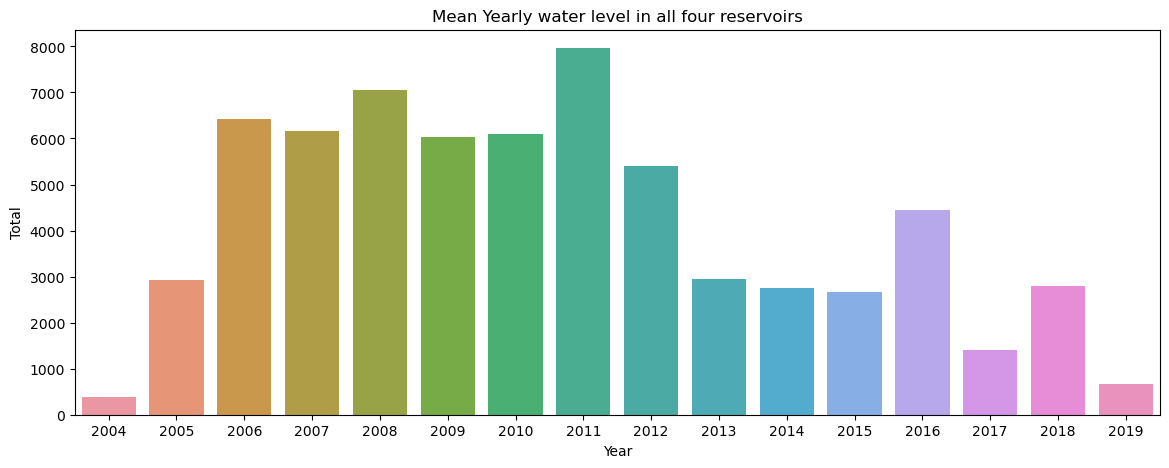

In [27]:
plt.figure(figsize=(14,5))
sns.barplot(x='Year',y='Total',data=Yearwise.mean())
plt.title('Mean Yearly water level in all four reservoirs')
plt.show()

In [29]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Year',
       'Month', 'Total'],
      dtype='object')

<Axes: xlabel='Year'>

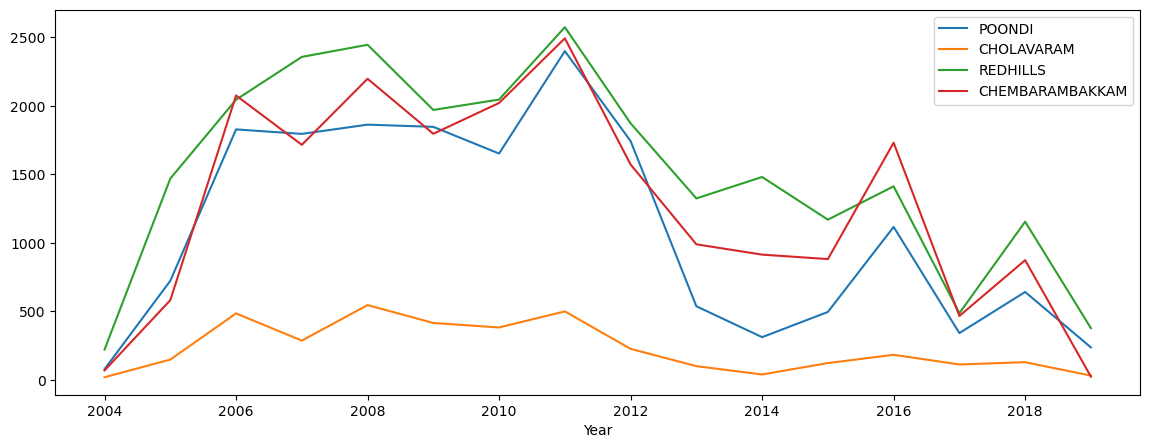

In [32]:

Yearwise.mean().plot(x='Year',y=['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'],figsize=(14,5))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Year             5647 non-null   int64         
 6   Month            5647 non-null   int64         
 7   Total            5647 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 353.1 KB


In [36]:
df['Month']= pd.Categorical(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Year             5647 non-null   int64         
 6   Month            5647 non-null   category      
 7   Total            5647 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 314.9 KB


<Axes: xlabel='Year', ylabel='Total'>

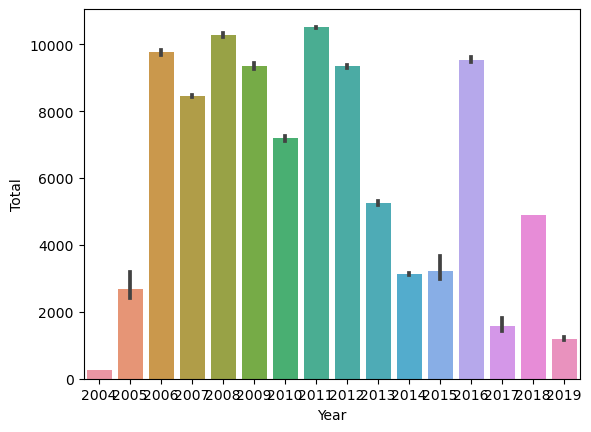

In [38]:
jan = df[df['Month']==1]
sns.barplot(x='Year',y='Total',data=jan)

<Axes: xlabel='Year', ylabel='Total'>

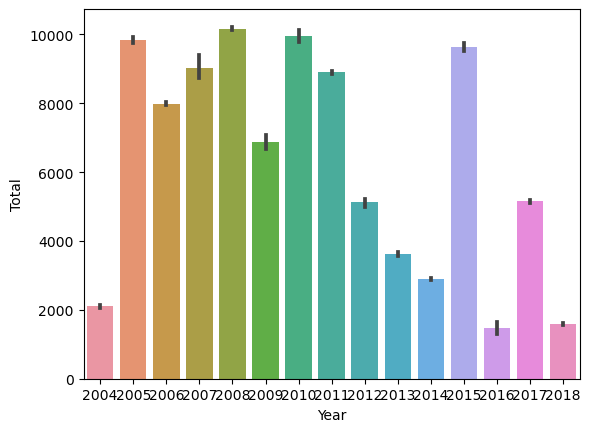

In [39]:
dec = df[df['Month']==12]
sns.barplot(x='Year',y='Total',data=dec)

In [43]:
df['Month']= df['Month'].astype(str)

<Axes: xlabel='Year', ylabel='Total'>

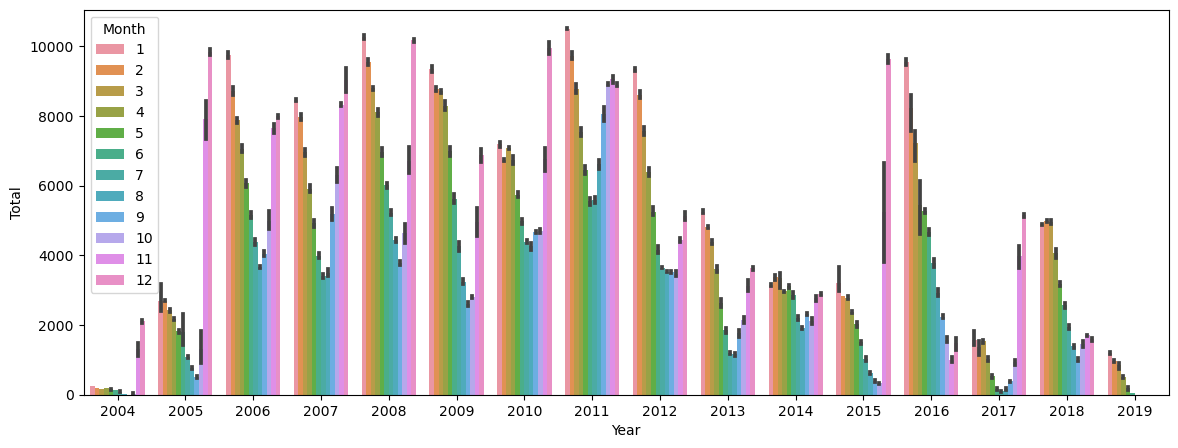

In [44]:
plt.figure(figsize=(14,5))
sns.barplot(x='Year',y='Total',hue='Month',data=df)